In [1]:
# Name: Hasan Fatih Durkaya
# ID: 504241526

# Hw I - Fully Connected Neural Networks (100 Points)

We covered artificial neural networks with multiple hidden layers in class. In this assignment, you will implement Fully Connected Neural Network (FCN) components in order to perform a supervised classification task.

The dataset you are going to work with are : (i) for development of your code, you will use diamonds dataset for classification; (ii) for actual training and testing of your implementation in this assignment.

Usage of any built-in functions for code parts that you are asked to write are not allowed. We provide a skeleton code on which to build on your own architecture. In the Layer class, there are two important methods, named as forward and backward. Almost everything you will use in this assignment is derived from this class. We will follow PyTorch-like architecture in the skeleton code.

**Please do not modify the following cells. We will use them for the evaluation of your homeworks. **

**You should modify and fill in the code under DL/layers.py, which includes functions such as layer.NNLayer.* ...**



In [2]:
import numpy as np

# Importing the necessary modules, this part has changed due to the folder structure.

import bases
import layers
import activations
import losses
import classifiers
import optimizers

#from DL import bases, layers, activations, losses, classifiers, optimizers

from checker.checks import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

**You should read:** https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b

### To auto-reload your modules from the *.py files, re run the following cell

In [3]:
%reload_ext autoreload
%autoreload 2

## 1 Layers, Activations and Optimizers

In the `Layer` class, there are two important methods, named as `forward` and `backward`. Almost everything you will use in this assignment is derived from this class. You will be programming in Python language.

**Don't forget to test your implementation by using the cells below!**



### a. Affine Layer 

In this layer, we basically implement the hidden layers of neural nets. Each neuron (building block of neural networks) is a just logistic regression classifier itself, but stacking these neurons make them powerful to implement any function.
We are going to implement our affine layer 

Go under `DL/layers.py` and find `AffineLAyer` class. Implement the forward pass for Affine layer which is formulated as follows:

$ z = W x + b $ 

#### Forward pass

In [4]:
num_inputs = 10
input_shape = (4, 7, 2) 
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layers.AffineLayer(input_size, weight_size)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
affineLayer.W = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
affineLayer.b = np.linspace(-0.3, 0.1, num=output_dim)

out = affineLayer.forward(x)
relError = rel_error(out, "affine_forward")

print('Testing forward method of affine layer:')
print(f'difference: {relError}')
assert 1e-6 > relError

Testing forward method of affine layer:
difference: 8.825372662436368e-08


#### Backward pass : 
Go under `DL/layers.py` and find `AffineLayer` class. Implement the backward pass for Affine layer.

In [5]:
np.random.seed(250)
num_inputs = 7
input_shape = (4, 10, 3)
output_dim = 8

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)
affineLayer = layers.AffineLayer(input_size, weight_size)

x = np.random.randn(13, 2, 3)
affineLayer.W = np.random.randn(6, 5)
affineLayer.b = np.random.randn(5)
dout = np.random.randn(13, 5)

dx_num = grad_check(affineLayer.forward, x, dout)
dw_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.W, dout)
db_num = grad_check(lambda _ : affineLayer.forward(x), affineLayer.b, dout)

affineLayer.forward(x)
dx, dw, db = affineLayer.backward(dout)

# Errors should be around 1e-6 at least
print('Testing backward method of affine layer:')
print(f'dx error: {rel_error(dx_num, dx)}')
print(f'dw error: {rel_error(dw_num, dw)}')
print(f'db error: {rel_error(db_num, db)}')

assert 1e-6 > rel_error(dx_num, dx) 
assert 1e-6 > rel_error(dw_num, dw) 
assert 1e-6 > rel_error(db_num, db) 

Testing backward method of affine layer:
dx error: 1.2583719079635203e-09
dw error: 1.5263035322254397e-09
db error: 5.183871742878614e-10


### b. Activation Layers 

Go under `DL/activations.py` and find `ExponentialLinearUnit` class. Implement the forward pass for ExponentialLinearUnit:

ELU(x) = 
\begin{cases} 
x & \text{if } x > 0 \\
\alpha (e^x - 1) & \text{if } x \leq 0
\end{cases}


#### Forward pass

In [6]:
exponentialLinearUnit = activations.ExponentialLinearUnit(1.0)
x = 2*(np.array([0,1,3,4,-1,2,4,1773,-1773, 1.3, .4, -.1]).reshape(3, -1))
out = exponentialLinearUnit.forward(x)
import numpy as np

# Change print format settings
np.set_printoptions(suppress=True, precision=3)
print(np.array(out))

# Compare your output with ours. 
relError = rel_error(out, "ExponentialLinearUnit_forward")
print('Testing forward method of ExponentialLinearUnit layer:')
print(f'Error: {relError}')
assert 1e-6 > relError

[[   0.       2.       6.       8.   ]
 [  -0.865    4.       8.    3546.   ]
 [  -1.       2.6      0.8     -0.181]]
Testing forward method of ExponentialLinearUnit layer:
Error: 2.15099408081792e-10


#### Backward pass

In [7]:
exponentialLinearUnit = activations.ExponentialLinearUnit(1.0)
np.random.seed(1773)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = grad_check(exponentialLinearUnit.forward, x, dout)

exponentialLinearUnit.forward(x)
dx = exponentialLinearUnit.backward(dout)


# The error should be around 2e-11
print('Testing backward method of exponentialLinearUnit layer:')
print(f'dx error: {rel_error(dx_num, dx)}')

Testing backward method of exponentialLinearUnit layer:
dx error: 2.4835501055568096e-11


### c. Softmax classifier  

In multi-class classification task, as we've seen in the class, the softmax loss function is utilized. 
Practically, at the final layer of the network, instead of the standard activation, we utilize softmax function to turn the likelihood of each class into class probabilities. Then, we utilize the cross-entropy loss as the data loss. Below, you implement and return only the data loss component in your overall loss. 

***Implement your loss computation in the function `loss` of the `DL/losses.py`***

You will write forward pass and backward pass for the softmax unit. Below, we evaluate your method by a numerical gradient method.

In [8]:
np.random.seed(1773)
num_classes, num_inputs = 8, 60
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)
softmax = classifiers.Softmax()

def softmax_loss(x,y):
    probs = softmax.forward(x)
    dx = softmax.backward(y)
    loss = losses.loss(probs, y) 
    return loss,dx


loss, dx = softmax_loss(x,y)
print(loss, dx.shape)
dx_num = grad_check(lambda x: softmax_loss(x, y)[0], x)

# The loss should be about 2.0
relError = rel_error(dx_num, dx)
print('Testing softmax_loss:')
print(f'loss: {loss}')
print(f'dx error: {relError}')
assert 3 > loss
assert 1e-6 > relError

2.079497685612568 (60, 8)
Testing softmax_loss:
loss: 2.079497685612568
dx error: 6.5653583482857845e-09


### d. Implement RmsProp optimizer 
Implement RmsProp Strategy in 'Rmsprop' classes. Test their correctness using the cell below. 
Implement `RmsProp` class in `DL/optimizers.py`.

In [9]:
np.random.seed(1773)
toyModel = bases.Model()
model_layers = [layers.AffineLayer(10,2, seed=1773), layers.AffineLayer(2,3, seed=1773), classifiers.Softmax()]
toyModel(model_layers)
optimizer = optimizers.RMSprop(model=toyModel, lr=1, beta=0.9, epsilon=1e-8)

x = np.random.randn(3,10)
y = np.array([0,1,2]).reshape(-1)
toyModel.forward(x)
toyModel.backward(y)
optimizer.optimize()

student_out = []
for i in range(2):
    student_out.append(toyModel[i].W)
    student_out.append(toyModel[i].b)
    
for i in range(4):
    layer_name = ["weights", "biases"][i%2]
    relError = rel_error(student_out[i], f"RMSprop_{layer_name}_{i//2}")
    print(f'Testing {layer_name} of {i//2}th layer')
    assert 1e-6 > relError

Testing weights of 0th layer
Testing biases of 0th layer
Testing weights of 1th layer
Testing biases of 1th layer


## 2. Build and test your own model! (85 points)

Below is an example which is implemented using previously defined API. In this example, you will use a subset of diamonds dataset (https://github.com/mwaskom/seaborn-data/blob/master/diamonds.csv). Each instance has 4 features in this subset. You will select a pair of two features and do your experiments on it. 

In [10]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

# create a subset
diamonds_filtered = (diamonds[diamonds['color'].isin(['E', 'J', 'H'])]).iloc[:500]
diamonds_filtered = diamonds_filtered[['carat','depth', 'table', 'color', 'price']]

# Display the first few rows of the DataFrame
print(diamonds_filtered.head())

   carat  depth  table color  price
0   0.23   61.5   55.0     E    326
1   0.21   59.8   61.0     E    326
2   0.23   56.9   65.0     E    327
4   0.31   63.3   58.0     J    335
5   0.24   62.8   57.0     J    336


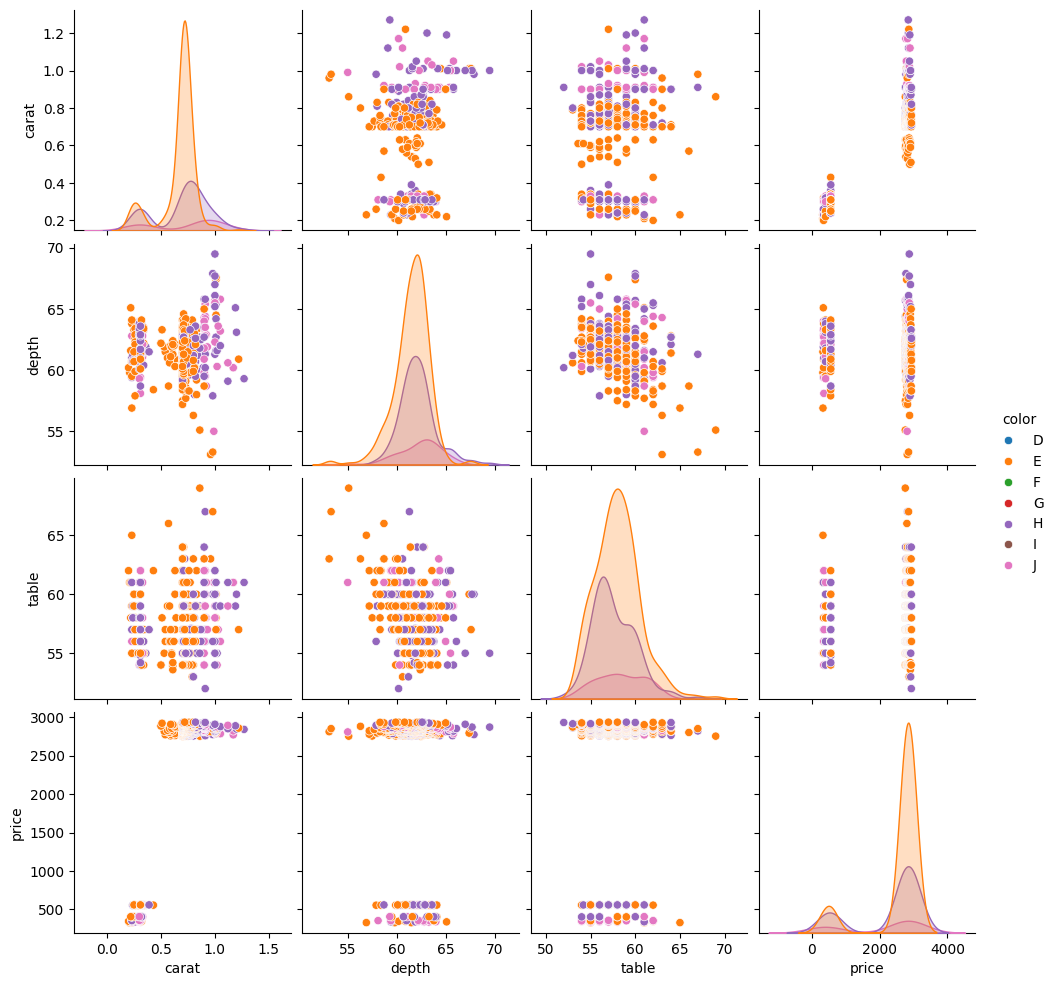

In [12]:
sns.pairplot(diamonds_filtered,hue='color')

### Comment:
Consider any pair of features? Do you think they are linearly separable? 

In [13]:
#comment here. which 2D projections seems easier to work on. 
# Linearly seperability is hard in the above plots. But below features can be used to seperate the data.
# Due to the amount and the distribution of the data, it seems that the carat and table columns are the most useful ones to work on.
# On the other hand the depth and price columns are not as useful as the other two. Carat and depth can be used to.

### Prepare your data 

In [14]:
from sklearn import preprocessing

# Carat and table features are selected and one-hot encoded color feature is used as the target feature.
data = diamonds_filtered[['carat', 'table', 'color']].dropna()

X = data[['carat', 'table']].values

# One-hot encode the target feature color.
one_hot_encoder = preprocessing.OneHotEncoder(sparse_output=False)
y = one_hot_encoder.fit_transform(data[['color']])

# Printing the shapes of the data.
print(f'Number of data points: {X.shape[0]}')
print(f'Shape of X: {X.shape}')
print(f'Shape of y (one-hot encoded): {y.shape}')


Number of data points: 500
Shape of X: (500, 2)
Shape of y (one-hot encoded): (500, 3)


### f. Model and Training (15pts) 
Create a one hidden layer multilayer neural network model, train and test. 
* Obtain at least 70% test accuracy in 30 epochs, at most.
* Tune the variables as you wish. 
* For activations, optimizers you can choose any. But the following question asks you to compare cases. 

In [15]:
# Complete the code below

#Importing the necessary modules from files.
from layers import AffineLayer
from optimizers import RMSprop
from activations import ExponentialLinearUnit
from classifiers import Softmax
from losses import loss
from bases import Model
import numpy as np

model = bases.Model() # Create a model instance

# Model layers; 2 affine layers with ELU activation and a softmax layer.
model_layers = [
    AffineLayer(input_size=2, output_size=16, seed=42),
    ExponentialLinearUnit(),
    AffineLayer(input_size=16, output_size=3, seed=42),
    Softmax()
]


model(model_layers) 
predictions = np.ones(y.shape[0])
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Shuffle dataset
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index = int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test

# L1 regularization     
def l1_regularization(model, strength):
    
    regularization_loss = 0
    
    for layer in model.layers:
        if isinstance(layer, layers.AffineLayer):
            regularization_loss += np.sum(np.abs(layer.W))
    
    return strength * regularization_loss  

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0.005 
n_epochs = 24
train_test_split_ratio = 0.2
print_every = 1
test_every = 1
test_points = []

if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

# Optimizer initialization, learning rate is set to 0.05
optimizer = RMSprop(model=model, lr=0.05)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    # Forward pass call
    softmax_out = model.forward(X_train)
    
    # Gettting the predictions and target labels
    predictions = np.argmax(softmax_out, axis=1)
    y_train_indices = np.argmax(y_train, axis=1)  

    # Loss Calculation
    loss_value = losses.loss(softmax_out, y_train_indices) + l1_regularization(model, regularization_strength)

    # Accuracy Calculation
    train_acc = np.mean(predictions == y_train_indices)
    train_accs.append(train_acc)
    train_losses.append(loss_value)
    
    if epoch % print_every == 0:
        print(f"TRAIN:\tEpoch: {epoch:3d}, Loss: {loss_value:.5f}, Accuracy: {train_acc:.5f}")
    
    # Backward pass call
    model.backward(y_train_indices)  
    optimizer.optimize()

    # Testing phase
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        
        # Forward pass call
        softmax_out = model.forward(X_test)
        
        # Gettting the predictions and target labels
        predictions = np.argmax(softmax_out, axis=1)
        y_test_indices = np.argmax(y_test, axis=1)  
        
        # Test loss calculation
        test_loss = losses.loss(softmax_out, y_test_indices) + l1_regularization(model, regularization_strength)
        
        # Test accuracy calculation        
        test_acc = np.mean(predictions == y_test_indices)
        test_losses.append(test_loss)
        test_points.append(epoch)
        test_accs.extend([test_acc for i in range(test_every)])    
        
        print(f"TEST:\tEpoch: {epoch:3d}, Loss: {test_loss:.5f}, Accuracy: {test_acc:.5f}")
print(max(test_accs))    

(400, 2) (400, 3)
TRAIN:	Epoch:   0, Loss: 1.26782, Accuracy: 0.21750
TEST:	Epoch:   0, Loss: 1.11802, Accuracy: 0.68000
TRAIN:	Epoch:   1, Loss: 1.76713, Accuracy: 0.56750
TEST:	Epoch:   1, Loss: 1.14535, Accuracy: 0.65000
TRAIN:	Epoch:   2, Loss: 1.20210, Accuracy: 0.55250
TEST:	Epoch:   2, Loss: 1.04881, Accuracy: 0.69000
TRAIN:	Epoch:   3, Loss: 1.15569, Accuracy: 0.60000
TEST:	Epoch:   3, Loss: 1.02030, Accuracy: 0.76000
TRAIN:	Epoch:   4, Loss: 1.08478, Accuracy: 0.63000
TEST:	Epoch:   4, Loss: 0.99426, Accuracy: 0.71000
TRAIN:	Epoch:   5, Loss: 1.06046, Accuracy: 0.61000
TEST:	Epoch:   5, Loss: 0.96826, Accuracy: 0.72000
TRAIN:	Epoch:   6, Loss: 1.04147, Accuracy: 0.64000
TEST:	Epoch:   6, Loss: 0.96273, Accuracy: 0.71000
TRAIN:	Epoch:   7, Loss: 1.03122, Accuracy: 0.61750
TEST:	Epoch:   7, Loss: 0.92270, Accuracy: 0.72000
TRAIN:	Epoch:   8, Loss: 1.02798, Accuracy: 0.63500
TEST:	Epoch:   8, Loss: 0.94127, Accuracy: 0.69000
TRAIN:	Epoch:   9, Loss: 1.02210, Accuracy: 0.63500
TES

### f. Plot the training and test loss curves for diagnostics below (10 pts):



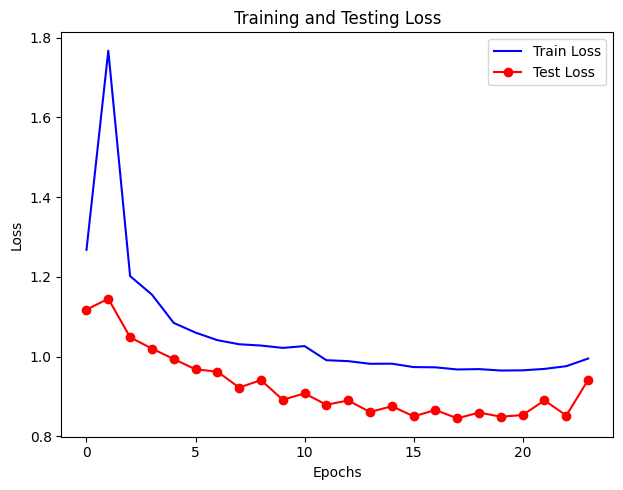

In [16]:
import matplotlib.pyplot as plt
# insert your code below

# Plot training and test losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Train Loss', color='blue')
plt.plot(test_points, test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

### g1. Compare the performances of at least three different activation functions.  (10 pts)
Comment on the result. 

(400, 2) (400, 3)
Relu Model TRAIN:	Epoch:   0, Loss: 1.26780, Accuracy: 0.33000
Softplus Model TRAIN:	Epoch:   0, Loss: 1.26766, Accuracy: 0.39750
Sigmoid Model TRAIN:	Epoch:   0, Loss: 1.27061, Accuracy: 0.42750
Relu Model TEST:	Epoch:   0, Loss: 1.11793, Accuracy: 0.68000
Softplus Model TEST:	Epoch:   0, Loss: 0.96867, Accuracy: 0.68000
Sigmoid Model TEST:	Epoch:   0, Loss: 0.98874, Accuracy: 0.71000
Relu Model TRAIN:	Epoch:   1, Loss: 1.76708, Accuracy: 0.56750
Softplus Model TRAIN:	Epoch:   1, Loss: 1.57148, Accuracy: 0.57000
Sigmoid Model TRAIN:	Epoch:   1, Loss: 1.23655, Accuracy: 0.59000
Relu Model TEST:	Epoch:   1, Loss: 1.14538, Accuracy: 0.65000
Softplus Model TEST:	Epoch:   1, Loss: 2.12275, Accuracy: 0.27000
Sigmoid Model TEST:	Epoch:   1, Loss: 0.99193, Accuracy: 0.68000
Relu Model TRAIN:	Epoch:   2, Loss: 1.20209, Accuracy: 0.55500
Softplus Model TRAIN:	Epoch:   2, Loss: 2.14676, Accuracy: 0.33000
Sigmoid Model TRAIN:	Epoch:   2, Loss: 1.28666, Accuracy: 0.56750
Relu Mod

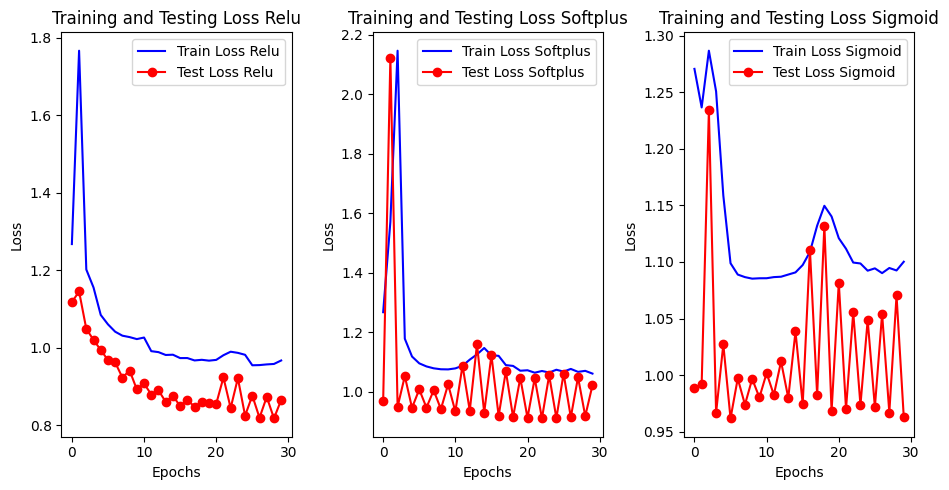

In [17]:
# Write the code

# Relu, Sfotplus and Sigmoid model instances
relu_model = Model()
softplus_model = Model()
sigmoid_model = Model()


#Same model layers for all three different models
relu_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.ReLU(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()]
softplus_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.Softplus(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()] # TODO a list of layers
sigmoid_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.Sigmoid(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()] # TODO a list of layers


# Same operations are applied for all three models and instances

relu_model(relu_model_layers)
softplus_model(softplus_model_layers)
sigmoid_model(sigmoid_model_layers)

relu_model_train_accs = []
softplus_model_train_accs = []
sigmoid_model_train_accs = []

relu_model_test_accs = []
softplus_model_test_accs = []
sigmoid_model_test_accs = []

relu_model_train_losses = []
softplus_model_train_losses = []
sigmoid_model_train_losses = []

relu_model_test_losses = []
softplus_model_test_losses = []
sigmoid_model_test_losses = []


# Regularization and shuffling operations

def l1_regularization(model, strength):
    regularization_loss = 0
    for layer in model.layers:
        if isinstance(layer, layers.AffineLayer):
            regularization_loss += np.sum(np.abs(layer.W))
    return strength * regularization_loss

def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index = int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test

preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0.005  
n_epochs = 30
train_test_split_ratio = 0.2
print_every = 1
test_every = 1
test_points = []


if preprocessing_on:
    X = preprocessing.scale(X)  

X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

#Same optimizer for all three models
relu_optimizer = optimizers.RMSprop(model=relu_model, lr=0.05)  
softplus_optimizer = optimizers.RMSprop(model=softplus_model, lr=0.05)  
sigmoid_optimizer = optimizers.RMSprop(model=sigmoid_model, lr=0.05)  


for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    y_train_indices = np.argmax(y_train, axis=1)

    # Forward pass calls
    relu_softmax_out = relu_model.forward(X_train)
    softplus_softmax_out = softplus_model.forward(X_train)
    sigmoid_softmax_out = sigmoid_model.forward(X_train)

    relu_predictions = np.argmax(relu_softmax_out, axis=1)
    softplus_predictions = np.argmax(softplus_softmax_out, axis=1)
    sigmoid_predictions = np.argmax(sigmoid_softmax_out, axis=1)
    
    relu_loss = losses.loss(relu_softmax_out, y_train_indices) + l1_regularization(relu_model, regularization_strength)
    softplus_loss = losses.loss(softplus_softmax_out, y_train_indices) + l1_regularization(softplus_model, regularization_strength)
    sigmoid_loss = losses.loss(sigmoid_softmax_out, y_train_indices) + l1_regularization(sigmoid_model, regularization_strength)
    
    # Calculating training accuracies
    relu_model_train_acc = np.mean(relu_predictions == y_train_indices)
    softplus_model_train_acc = np.mean(softplus_predictions == y_train_indices)
    sigmoid_model_train_acc = np.mean(sigmoid_predictions == y_train_indices)
    

    if epoch % print_every == 0:
        print(f"Relu Model TRAIN:\tEpoch: {epoch:3d}, Loss: {relu_loss:.5f}, Accuracy: {relu_model_train_acc:.5f}")
        print(f"Softplus Model TRAIN:\tEpoch: {epoch:3d}, Loss: {softplus_loss:.5f}, Accuracy: {softplus_model_train_acc:.5f}")
        print(f"Sigmoid Model TRAIN:\tEpoch: {epoch:3d}, Loss: {sigmoid_loss:.5f}, Accuracy: {sigmoid_model_train_acc:.5f}")
    

    relu_model_train_accs.append(relu_model_train_acc)
    softplus_model_train_accs.append(softplus_model_train_acc)
    sigmoid_model_train_accs.append(sigmoid_model_train_acc)

    relu_model_train_losses.append(relu_loss)
    softplus_model_train_losses.append(softplus_loss)
    sigmoid_model_train_losses.append(sigmoid_loss)
        
    # Backward pass calls
    y_train_indices = np.argmax(y_train, axis=1)
    
    relu_model.backward(y_train_indices)
    softplus_model.backward(y_train_indices)
    sigmoid_model.backward(y_train_indices)
    
    relu_optimizer.optimize()
    softplus_optimizer.optimize()
    sigmoid_optimizer.optimize()

    # Testing phase
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        
        relu_softmax_out = relu_model.forward(X_test)
        softplus_softmax_out = softplus_model.forward(X_test)
        sigmoid_softmax_out = sigmoid_model.forward(X_test)
        
        relu_predictions = np.argmax(relu_softmax_out, axis=1)
        softplus_predictions = np.argmax(softplus_softmax_out, axis=1)
        sigmoid_predictions = np.argmax(sigmoid_softmax_out, axis=1)
        
        relu_loss = losses.loss(relu_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(relu_model, regularization_strength)
        softplus_loss = losses.loss(softplus_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(softplus_model, regularization_strength)
        sigmoid_loss = losses.loss(sigmoid_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(sigmoid_model, regularization_strength)
        
        relu_model_test_acc = np.mean(relu_predictions == np.argmax(y_test, axis=1))
        softplus_model_test_acc = np.mean(softplus_predictions == np.argmax(y_test, axis=1))
        sigmoid_model_test_acc = np.mean(sigmoid_predictions == np.argmax(y_test, axis=1))
        
        relu_model_test_losses.append(relu_loss)
        softplus_model_test_losses.append(softplus_loss)
        sigmoid_model_test_losses.append(sigmoid_loss)
        
        test_losses.append(loss)
        test_points.append(epoch)
        
        relu_model_test_accs.extend([relu_model_test_acc for i in range(test_every)])
        softplus_model_test_accs.extend([softplus_model_test_acc for i in range(test_every)])
        sigmoid_model_test_accs.extend([sigmoid_model_test_acc for i in range(test_every)])
        
        print(f"Relu Model TEST:\tEpoch: {epoch:3d}, Loss: {relu_loss:.5f}, Accuracy: {relu_model_test_acc:.5f}")
        print(f"Softplus Model TEST:\tEpoch: {epoch:3d}, Loss: {softplus_loss:.5f}, Accuracy: {softplus_model_test_acc:.5f}")
        print(f"Sigmoid Model TEST:\tEpoch: {epoch:3d}, Loss: {sigmoid_loss:.5f}, Accuracy: {sigmoid_model_test_acc:.5f}")
        
print(f"Maximum test accuracy achieved (Relu): {max(relu_model_test_accs):.4f}")
print(f"Maximum test accuracy achieved (Softplus): {max(softplus_model_test_accs):.4f}")
print(f"Maximum test accuracy achieved (Sigmoid): {max(sigmoid_model_test_accs):.4f}")

# Plot training and test losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 2)
plt.plot(range(n_epochs), relu_model_train_losses, label='Train Loss Relu', color='blue')
plt.plot(test_points, relu_model_test_losses, label='Test Loss Relu', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Relu')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(range(n_epochs), softplus_model_train_losses, label='Train Loss Softplus', color='blue')
plt.plot(test_points, softplus_model_test_losses, label='Test Loss Softplus', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Softplus')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(range(n_epochs), sigmoid_model_train_losses, label='Train Loss Sigmoid', color='blue')
plt.plot(test_points, sigmoid_model_test_losses, label='Test Loss Sigmoid', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss Sigmoid')
plt.legend()

plt.tight_layout()
plt.show() 



As can be seen from the results Relu has a smoother performance fast convergence and stable performance on the other hand Softplus and Sigmoid has more changes they are saturating more and do not have a stable performance. Relu seems like the best option of that three

### g2. Compare the performances of different learning rates.  (10 pts)
Comment on the result. 

(400, 2) (400, 3)
LR1 Model TRAIN:	Epoch:   0, Loss: 1.26780, Accuracy: 0.33000
LR2 Model TRAIN:	Epoch:   0, Loss: 1.26780, Accuracy: 0.33000
LR3 Model TRAIN:	Epoch:   0, Loss: 1.26780, Accuracy: 0.33000
LR1 Model TEST:	Epoch:   0, Loss: 1.26109, Accuracy: 0.39000
LR2 Model TEST:	Epoch:   0, Loss: 1.11793, Accuracy: 0.68000
LR3 Model TEST:	Epoch:   0, Loss: 1.14318, Accuracy: 0.68000
LR1 Model TRAIN:	Epoch:   1, Loss: 1.26007, Accuracy: 0.41750
LR2 Model TRAIN:	Epoch:   1, Loss: 1.76708, Accuracy: 0.56750
LR3 Model TRAIN:	Epoch:   1, Loss: 1.23505, Accuracy: 0.57000
LR1 Model TEST:	Epoch:   1, Loss: 1.25051, Accuracy: 0.42000
LR2 Model TEST:	Epoch:   1, Loss: 1.14538, Accuracy: 0.65000
LR3 Model TEST:	Epoch:   1, Loss: 1.17217, Accuracy: 0.71000
LR1 Model TRAIN:	Epoch:   2, Loss: 1.25526, Accuracy: 0.45500
LR2 Model TRAIN:	Epoch:   2, Loss: 1.20209, Accuracy: 0.55500
LR3 Model TRAIN:	Epoch:   2, Loss: 1.20113, Accuracy: 0.64000
LR1 Model TEST:	Epoch:   2, Loss: 1.24267, Accuracy: 0.500

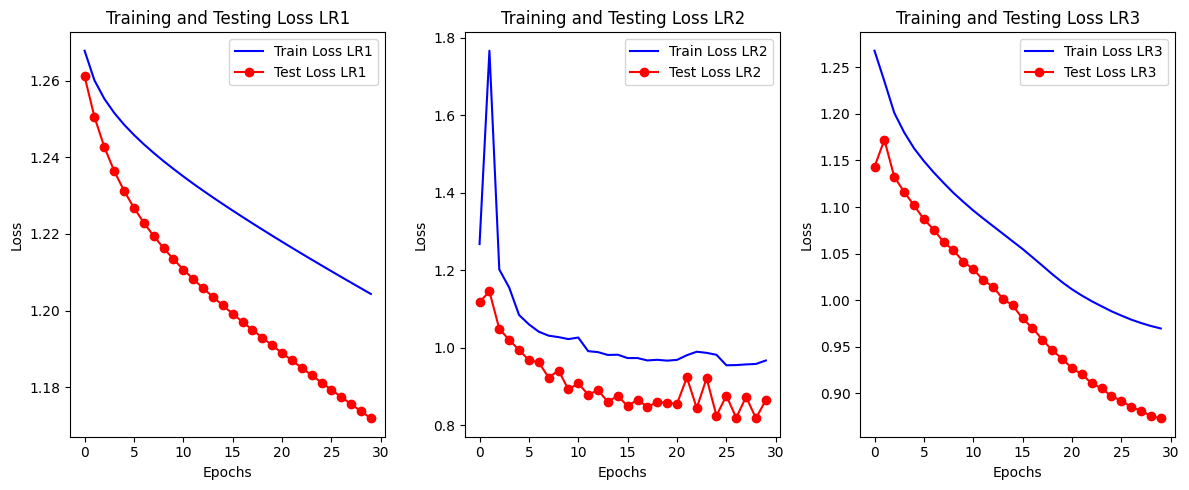

In [18]:
# Write the code 

lr1_model = Model()
lr2_model = Model()
lr3_model = Model()



lr1_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.ReLU(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()]
lr2_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.ReLU(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()]
lr3_model_layers = [layers.AffineLayer(2, 16, seed=42),
                activations.ReLU(),
                layers.AffineLayer(16, 3, seed=42),
                classifiers.Softmax()]


lr1_model(lr1_model_layers)
lr2_model(lr2_model_layers)
lr3_model(lr3_model_layers)

lr1_model_train_accs = []
lr2_model_train_accs = []
lr3_model_train_accs = []

lr1_model_test_accs = []
lr2_model_test_accs = []
lr3_model_test_accs = []

lr1_model_train_losses = []
lr2_model_train_losses = []
lr3_model_train_losses = []

lr1_model_test_losses = []
lr2_model_test_losses = []
lr3_model_test_losses = []


def l1_regularization(model, strength):
    regularization_loss = 0
    for layer in model.layers:
        if isinstance(layer, layers.AffineLayer):
            regularization_loss += np.sum(np.abs(layer.W))
    return strength * regularization_loss

def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index = int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test

# Improved hyperparameters:
preprocessing_on = True  # Enable preprocessing for better feature scaling
shuffle_on_each_epoch = True
regularization_strength = 0.005  # Reduced from 0.1 to prevent over-regularization
n_epochs = 30
train_test_split_ratio = 0.2
print_every = 1
test_every = 1
test_points = []

# Apply preprocessing
if preprocessing_on:
    X = preprocessing.scale(X)  # Standardize features

X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

# Improved optimizer settings with better learning rate
lr1_optimizer = optimizers.RMSprop(model=lr1_model, lr=0.001)  # Reduced learning rate for more stable training
lr2_optimizer = optimizers.RMSprop(model=lr2_model, lr=0.05)  # Reduced learning rate for more stable training
lr3_optimizer = optimizers.RMSprop(model=lr3_model, lr=0.01)  # Reduced learning rate for more stable training

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    # Forward pass
    lr1_softmax_out = lr1_model.forward(X_train)
    lr2_softmax_out = lr2_model.forward(X_train)
    lr3_softmax_out = lr3_model.forward(X_train)
    
    
    # Get predictions and calculate loss
    lr1_predictions = np.argmax(lr1_softmax_out, axis=1)
    lr2_predictions = np.argmax(lr2_softmax_out, axis=1)
    lr3_predictions = np.argmax(lr3_softmax_out, axis=1)
    
    lr1_loss = losses.loss(lr1_softmax_out, np.argmax(y_train, axis=1)) + l1_regularization(lr1_model, regularization_strength)
    lr2_loss = losses.loss(lr2_softmax_out, np.argmax(y_train, axis=1)) + l1_regularization(lr2_model, regularization_strength)
    lr3_loss = losses.loss(lr3_softmax_out, np.argmax(y_train, axis=1)) + l1_regularization(lr3_model, regularization_strength)
    
    
        # Calculate training accuracy
    lr1_model_train_acc = np.mean(lr1_predictions == np.argmax(y_train, axis=1))
    lr2_model_train_acc = np.mean(lr2_predictions == np.argmax(y_train, axis=1))
    lr3_model_train_acc = np.mean(lr3_predictions == np.argmax(y_train, axis=1))
    
    
    
    if epoch % print_every == 0:
        print(f"LR1 Model TRAIN:\tEpoch: {epoch:3d}, Loss: {lr1_loss:.5f}, Accuracy: {lr1_model_train_acc:.5f}")
        print(f"LR2 Model TRAIN:\tEpoch: {epoch:3d}, Loss: {lr2_loss:.5f}, Accuracy: {lr2_model_train_acc:.5f}")
        print(f"LR3 Model TRAIN:\tEpoch: {epoch:3d}, Loss: {lr3_loss:.5f}, Accuracy: {lr3_model_train_acc:.5f}")
    
    lr1_model_train_accs.append(lr1_model_train_acc)
    lr2_model_train_accs.append(lr2_model_train_acc)
    lr2_model_train_accs.append(lr2_model_train_acc)

    lr1_model_train_losses.append(lr1_loss)
    lr2_model_train_losses.append(lr2_loss)
    lr3_model_train_losses.append(lr3_loss)
    

    # Backward pass
    y_train_labels = np.argmax(y_train, axis=1)
    
    # Compute gradients and update weights
    lr1_model.backward(y_train_labels)
    lr2_model.backward(y_train_labels)
    lr3_model.backward(y_train_labels)
    
    lr1_optimizer.optimize()
    lr2_optimizer.optimize()
    lr3_optimizer.optimize()

    # Testing phase
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        
        lr1_softmax_out = lr1_model.forward(X_test)
        lr2_softmax_out = lr2_model.forward(X_test)
        lr3_softmax_out = lr3_model.forward(X_test)
        
        
        # Get predictions and calculate loss
        lr1_predictions = np.argmax(lr1_softmax_out, axis=1)
        lr2_predictions = np.argmax(lr2_softmax_out, axis=1)
        lr3_predictions = np.argmax(lr3_softmax_out, axis=1)
        
        lr1_loss = losses.loss(lr1_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(lr1_model, regularization_strength)
        lr2_loss = losses.loss(lr2_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(lr2_model, regularization_strength)
        lr3_loss = losses.loss(lr3_softmax_out, np.argmax(y_test, axis=1)) + l1_regularization(lr3_model, regularization_strength)
        
        lr1_model_test_acc = np.mean(lr1_predictions == np.argmax(y_test, axis=1))
        lr2_model_test_acc = np.mean(lr2_predictions == np.argmax(y_test, axis=1))
        lr3_model_test_acc = np.mean(lr3_predictions == np.argmax(y_test, axis=1))
        
        lr1_model_test_losses.append(lr1_loss)
        lr2_model_test_losses.append(lr2_loss)
        lr3_model_test_losses.append(lr3_loss)
        
        test_losses.append(loss)
        test_points.append(epoch)
        
        lr1_model_test_accs.extend([lr1_model_test_acc for i in range(test_every)])
        lr2_model_test_accs.extend([lr2_model_test_acc for i in range(test_every)])
        lr3_model_test_accs.extend([lr3_model_test_acc for i in range(test_every)])
        
        print(f"LR1 Model TEST:\tEpoch: {epoch:3d}, Loss: {lr1_loss:.5f}, Accuracy: {lr1_model_test_acc:.5f}")
        print(f"LR2 Model TEST:\tEpoch: {epoch:3d}, Loss: {lr2_loss:.5f}, Accuracy: {lr2_model_test_acc:.5f}")
        print(f"LR3 Model TEST:\tEpoch: {epoch:3d}, Loss: {lr3_loss:.5f}, Accuracy: {lr3_model_test_acc:.5f}")
        
print(f"Maximum test accuracy achieved (LR1): {max(lr1_model_test_accs):.4f}")
print(f"Maximum test accuracy achieved (LR2): {max(lr2_model_test_accs):.4f}")
print(f"Maximum test accuracy achieved (LR3): {max(lr3_model_test_accs):.4f}") 


# Plot training and test loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(range(n_epochs), lr1_model_train_losses, label='Train Loss LR1', color='blue')
plt.plot(test_points, lr1_model_test_losses, label='Test Loss LR1', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss LR1')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(n_epochs), lr2_model_train_losses, label='Train Loss LR2', color='blue')
plt.plot(test_points, lr2_model_test_losses, label='Test Loss LR2', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss LR2')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(n_epochs), lr3_model_train_losses, label='Train Loss LR3', color='blue')
plt.plot(test_points, lr3_model_test_losses, label='Test Loss LR3', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss LR3')
plt.legend()

plt.tight_layout()
plt.show()

As can be seen from the results when we increase the learning rate greater steps are taken but there will some missteps but if we have lower leraning rate low epoch number will create a problem and model can not converge with lower learning rate first one has the smallest learing rate (0.001) therefore loss is the greatest after that third one has the smallest wihch is 0.01 it has a good path always decreasing loss second plot ahs the greatest leaerning rate which is 0.05 and its performance are saturating and there are missteps.

### h. Plot the confusion Matrix (10 points)
Plot the confusion matrix and comment on the result (for your best result)

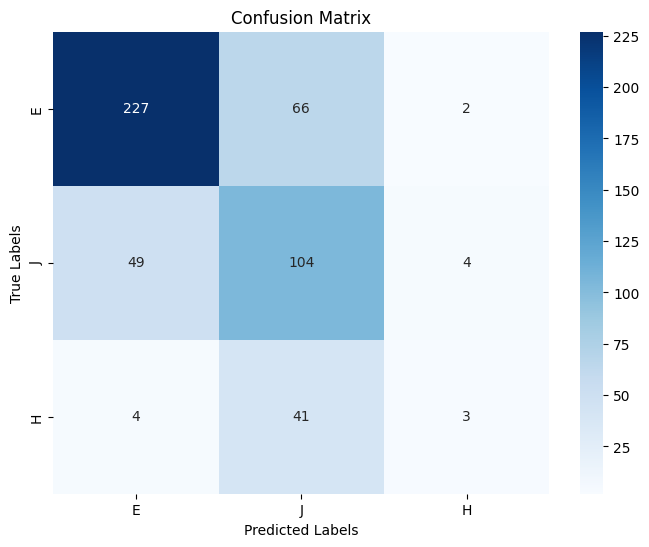

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# insert your code below

def plot_confusion_matrix(y_true, y_pred, class_names):
    
    # Converting one-hot labels to integer labels
    y_true_labels = np.argmax(y_true, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Generating predictions, plotting the confusion matrix
y_pred = model.forward(X)
plot_confusion_matrix(y, y_pred, class_names=['E', 'J', 'H'])

### i. Plot the decision boundary (10 points)
Here, plot the decision boundary of your best result on the feature space. Revisit the feature pair scatter plot of your chosen feature pair. Highlight different classes using different classes and markers. 
Make sure you can identify training and testing datasets separately. Alternatively you can plot two different scatter plots. The classification boundaries are the points on feature (input) space where any two classes have equal (or near equal probability). Also highlight misclassified samples. 

C:\Users\hfd\AppData\Local\Temp\ipykernel_21260\3108239276.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[misclassified][:, 0], X[misclassified][:, 1],


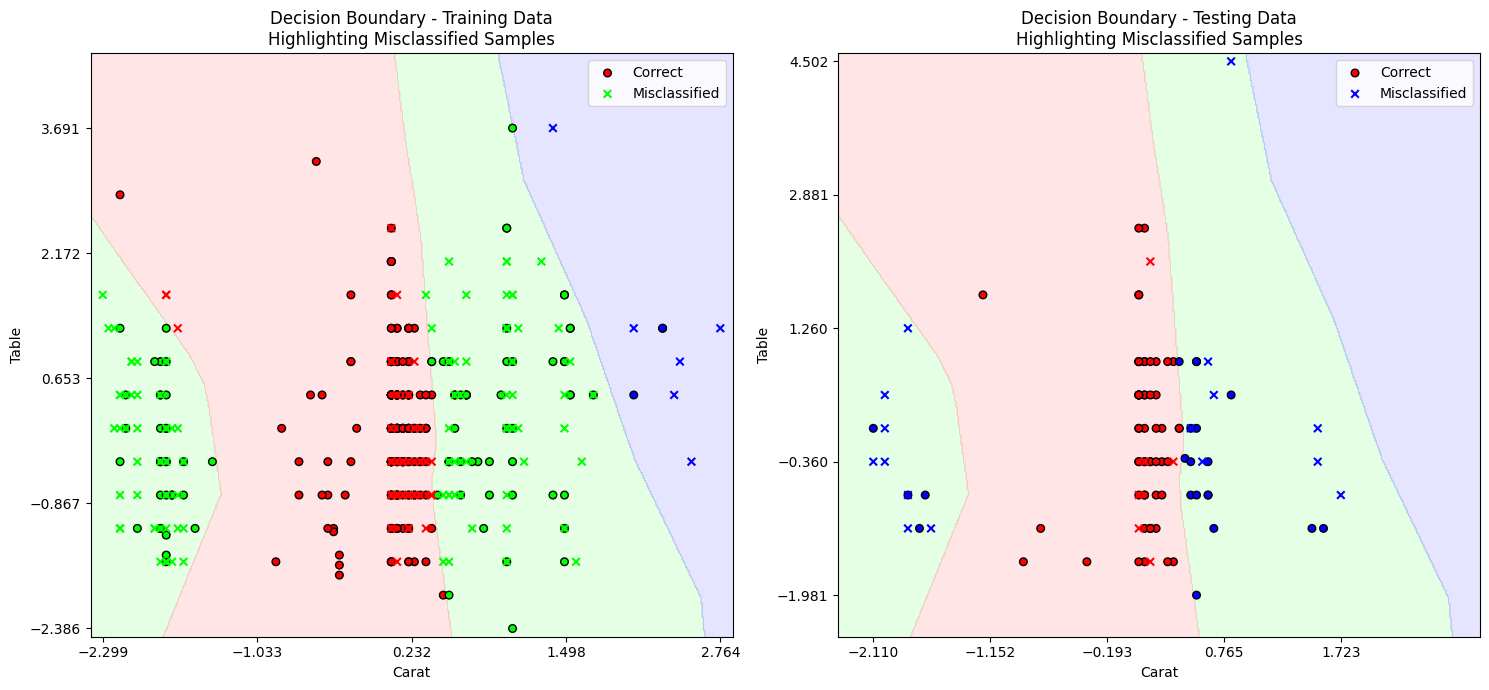

In [20]:
# Train neural network model and classifier
# (Assuming you have already trained the model and classifier)
# insert your code below

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_boundary(model, X_train, y_train, X_test, y_test):
    
    # Feature space boundaries fror carat and table features.
    x_min, x_max = min(X_train[:, 0].min(), X_test[:, 0].min()) - 0.1, max(X_train[:, 0].max(), X_test[:, 0].max()) + 0.1
    y_min, y_max = min(X_train[:, 1].min(), X_test[:, 1].min()) - 0.1, max(X_train[:, 1].max(), X_test[:, 1].max()) + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Class pobabilites for pointsa in the feature space
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.forward(grid_points)
    Z = np.argmax(Z, axis=1).reshape(xx.shape)

    # Color maps
    cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    for ax, X, y, title in zip(axes, [X_train, X_test], [y_train, y_test], ["Training Data", "Testing Data"]):
        #Plotting decision boundary
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

        # Identifying misclassified and correctly classified data sanmles   
        preds = np.argmax(model.forward(X), axis=1)
        misclassified = preds != np.argmax(y, axis=1)
        
        # Correctly classified samples
        ax.scatter(X[~misclassified][:, 0], X[~misclassified][:, 1], 
                   c=np.argmax(y[~misclassified], axis=1), cmap=cmap_points, 
                   edgecolor='k', s=30, label="Correct")

        # Missclassifed samples
        ax.scatter(X[misclassified][:, 0], X[misclassified][:, 1], 
                   c=preds[misclassified], cmap=cmap_points, edgecolor='k', 
                   s=30, marker='x', label="Misclassified")

        ax.set_xticks(np.linspace(X[:, 0].min(), X[:, 0].max(), 5))
        ax.set_yticks(np.linspace(X[:, 1].min(), X[:, 1].max(), 5))
        
        # Label axes and add title
        ax.set_xlabel("Carat")
        ax.set_ylabel("Table")
        ax.set_title(f"Decision Boundary - {title}\nHighlighting Misclassified Samples")
        ax.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

decision_boundary(model, X_train, y_train, X_test, y_test)



### k. Comment how does using different activation functions affect decision boundary? (5pts)

C:\Users\hfd\AppData\Local\Temp\ipykernel_21260\3108239276.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[misclassified][:, 0], X[misclassified][:, 1],


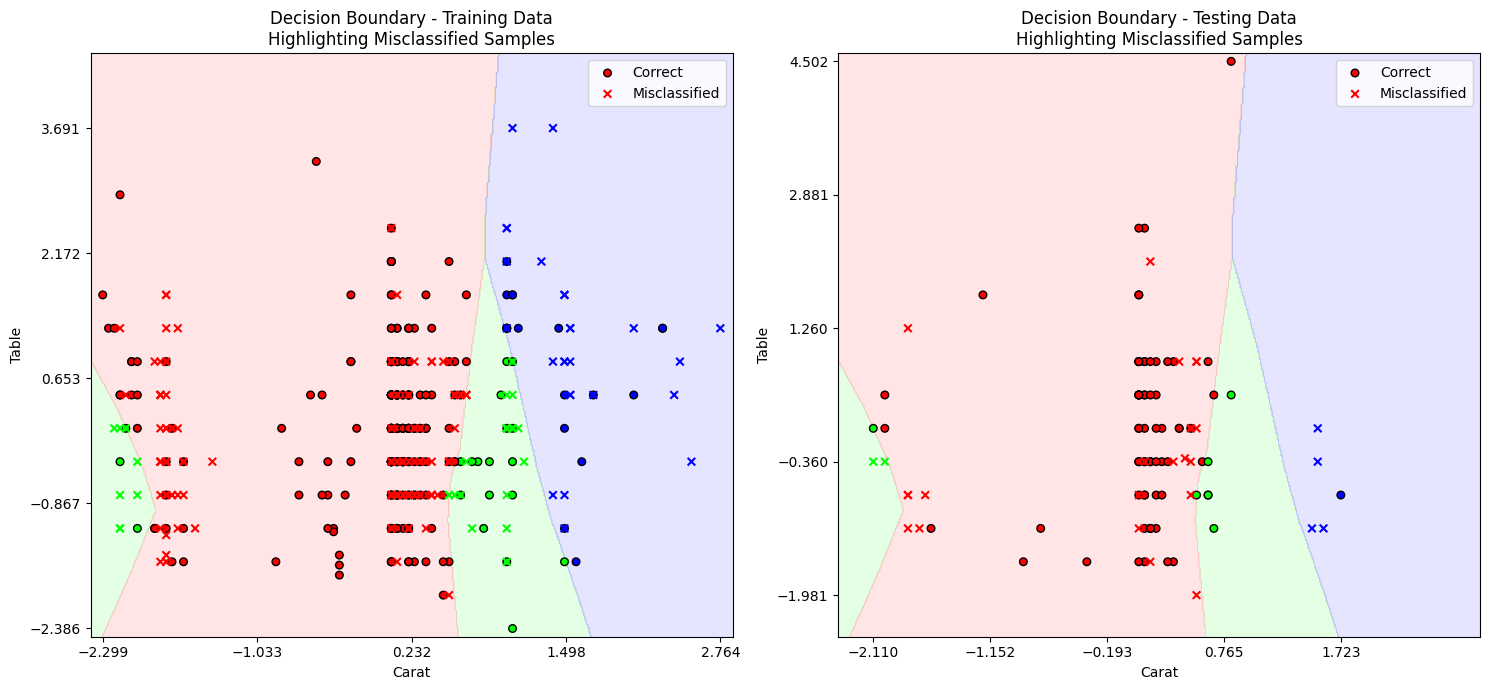

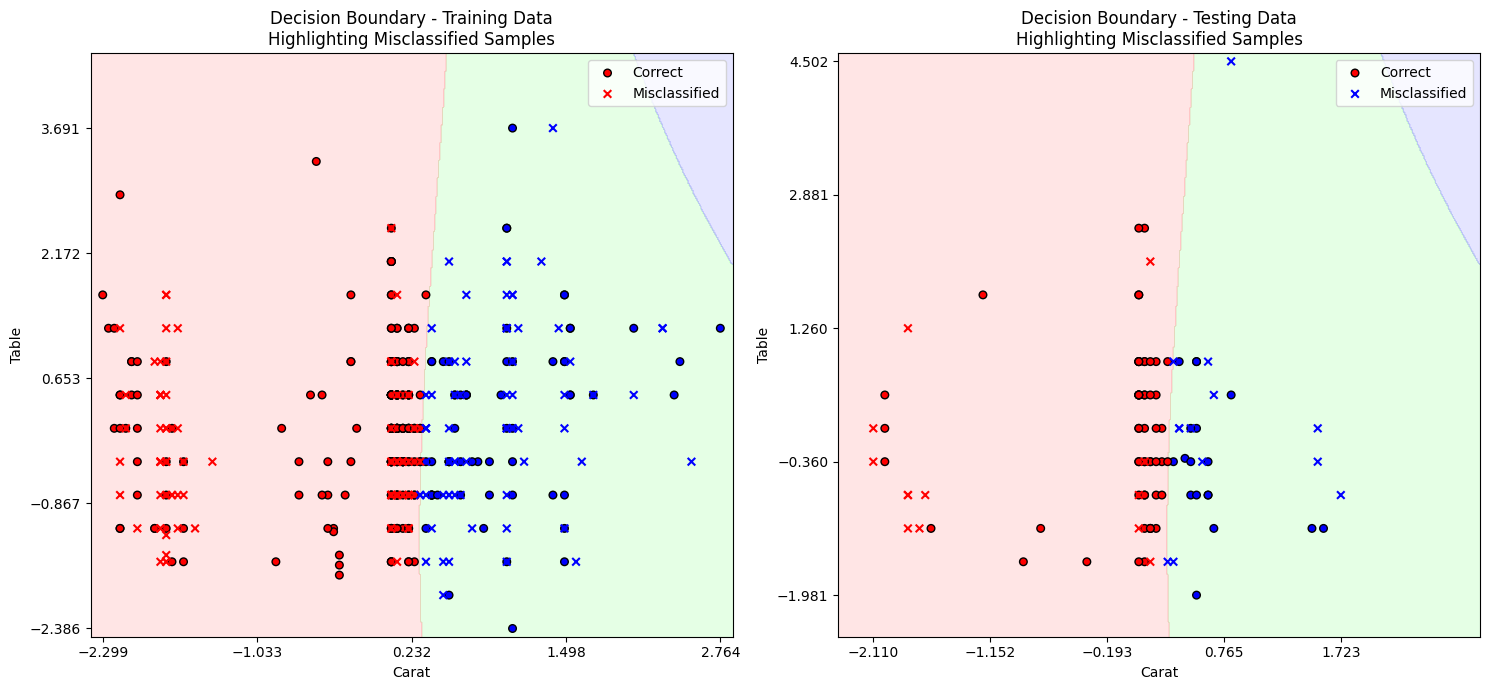

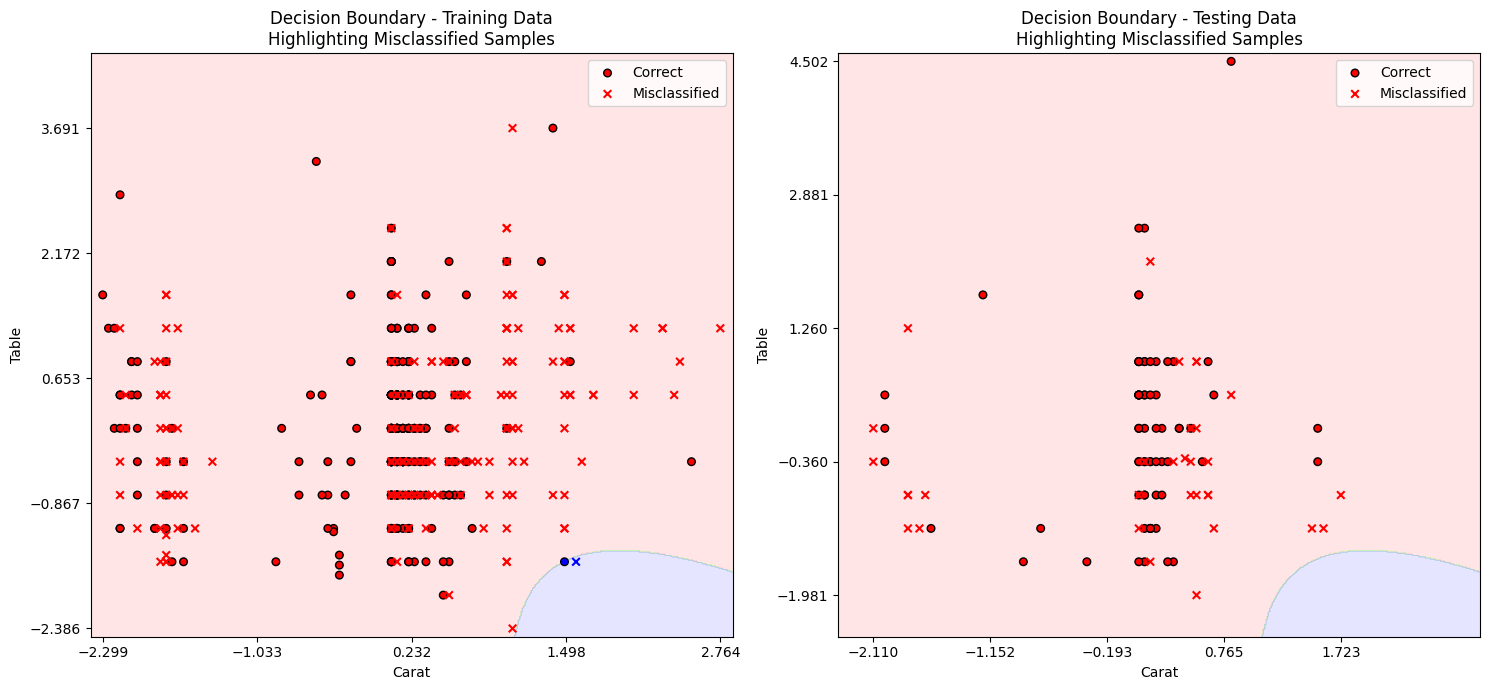

In [21]:
# show some plots and comment on them.
decision_boundary(relu_model, X_train, y_train, X_test, y_test)
decision_boundary(softplus_model, X_train, y_train, X_test, y_test)
decision_boundary(sigmoid_model, X_train, y_train, X_test, y_test) 

Using Relu as the activation function seems to be the best choice for this dataset.
Using Softplıus as the activation function seems to be the second best choice for this dataset. Because the blue decision boundary is nearly empty and there are many misclassified samples.
Using sigmoid as the activation function seems to be the worst choice for this dataset. Because Blue decision boundary is nearly empty and there are many misclassified samples. 
Green desiicon boundary is not there. So sigmoid is not a good choice for this dataset. But hence the red decision boundary has the most data points(nearly % 70 of the dataset)
predicting that class correct has more importance than the other two models.
As far as the plot tells it is hard to predict blue class correctly because it has the least data points. 

### l. Original diamonds dataset can also be classified according to different categories: cut and clarity. Which label is easier to classify for your model?  (15 pts)

Change the filtering to create different subsets with different labels, "here". Filter the subset to have three classes, 500 samples and 2 features per sample. Then, classify the samples. Comment on the results.

In [40]:
# insert your codes and write your comments here.

diamonds_filtered = (diamonds[diamonds['cut'].isin(['Ideal', 'Good', 'Very Good'])]).iloc[:500]
diamonds_filtered = diamonds_filtered[['carat','depth', 'table', 'cut', 'price']]

print(diamonds_filtered.head())

diamonds_filtered['cut'].value_counts()

   carat  depth  table        cut  price
0   0.23   61.5   55.0      Ideal    326
2   0.23   56.9   65.0       Good    327
4   0.31   63.3   58.0       Good    335
5   0.24   62.8   57.0  Very Good    336
6   0.24   62.3   57.0  Very Good    336


cut
Ideal        247
Very Good    179
Good          74
Premium        0
Fair           0
Name: count, dtype: int64

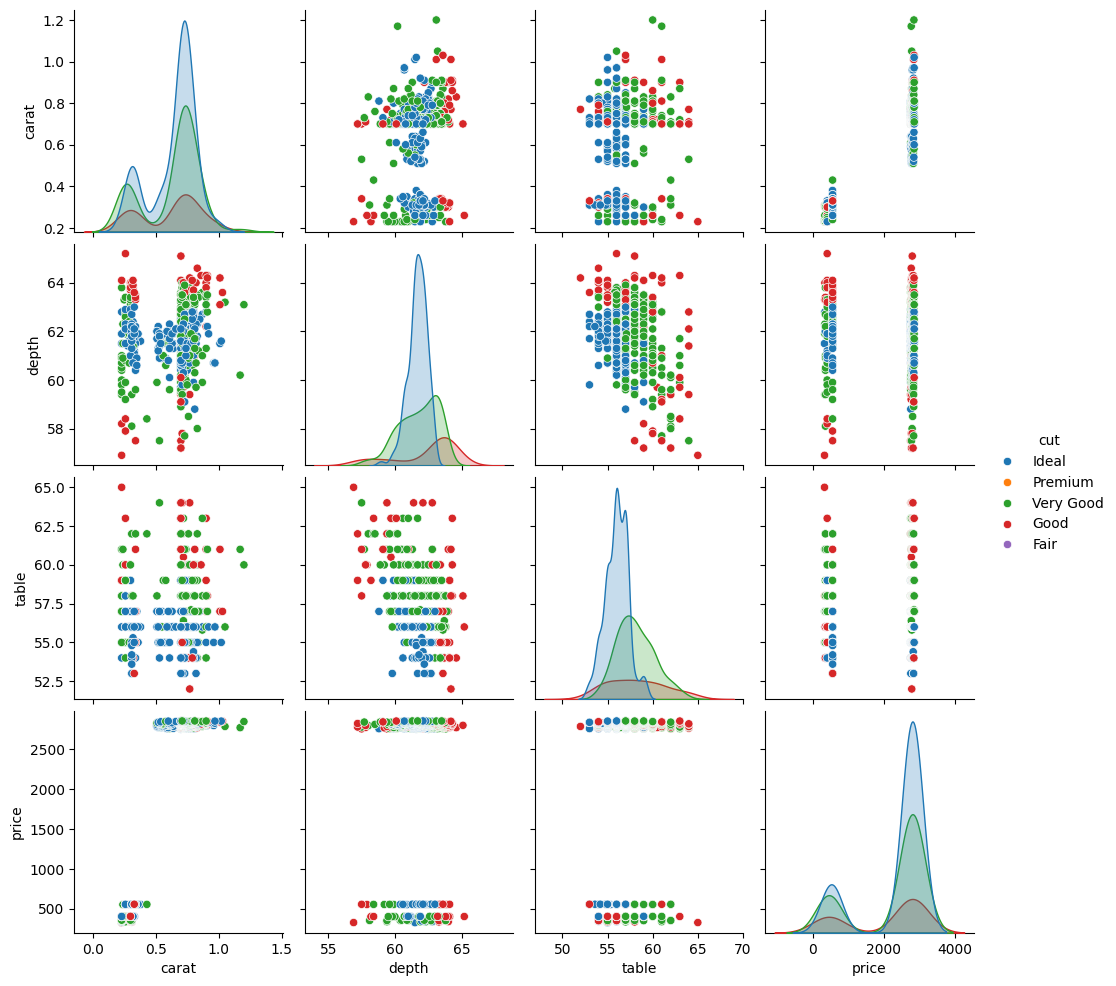

In [41]:
sns.pairplot(diamonds_filtered,hue='cut')

In [ ]:
from sklearn import preprocessing

# choose a pair of features to form data X. Convert the diamonds color label to index label y. 
# Drop NANs
data = diamonds_filtered[['depth', 'table', 'cut']].dropna() #TODO
# See how much data points you have 
# Prepare your data. Choose two feature columns. and get target labels as an integer or one-hot encoded value
X = data[['depth', 'table']].values

y = preprocessing.OneHotEncoder(sparse_output=False).fit_transform(data[['cut']])

# Shapes
print('Cut filtered dataset')
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

Cut filtered dataset
X shape: (500, 2)
y shape: (500, 3)


(400, 2) (400, 3)
TRAIN:	Epoch:   0, Loss: 1.20187, Accuracy: 0.46250
TEST:	Epoch:   0, Loss: 1.01367, Accuracy: 0.48000
TRAIN:	Epoch:   1, Loss: 1.07919, Accuracy: 0.57000
TEST:	Epoch:   1, Loss: 0.99296, Accuracy: 0.72000
TRAIN:	Epoch:   2, Loss: 1.04496, Accuracy: 0.64000
TEST:	Epoch:   2, Loss: 0.99755, Accuracy: 0.67000
TRAIN:	Epoch:   3, Loss: 1.05956, Accuracy: 0.59250
TEST:	Epoch:   3, Loss: 0.94945, Accuracy: 0.71000
TRAIN:	Epoch:   4, Loss: 0.98813, Accuracy: 0.64750
TEST:	Epoch:   4, Loss: 0.92255, Accuracy: 0.68000
TRAIN:	Epoch:   5, Loss: 0.96435, Accuracy: 0.63000
TEST:	Epoch:   5, Loss: 0.90312, Accuracy: 0.69000
TRAIN:	Epoch:   6, Loss: 0.94891, Accuracy: 0.63500
TEST:	Epoch:   6, Loss: 0.88782, Accuracy: 0.69000
TRAIN:	Epoch:   7, Loss: 0.93602, Accuracy: 0.64250
TEST:	Epoch:   7, Loss: 0.87309, Accuracy: 0.71000
TRAIN:	Epoch:   8, Loss: 0.92699, Accuracy: 0.63250
TEST:	Epoch:   8, Loss: 0.86271, Accuracy: 0.69000
TRAIN:	Epoch:   9, Loss: 0.91882, Accuracy: 0.63500
TES

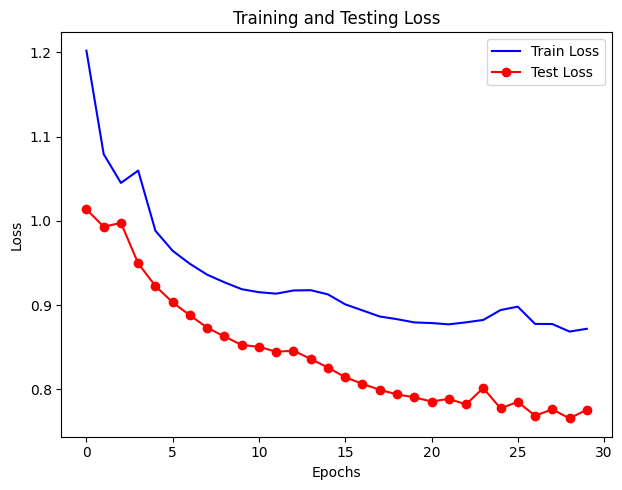

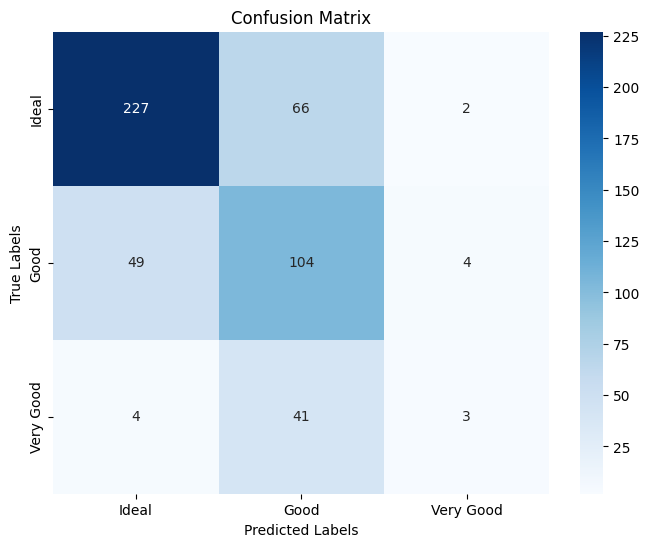

C:\Users\hfd\AppData\Local\Temp\ipykernel_21260\3108239276.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[misclassified][:, 0], X[misclassified][:, 1],


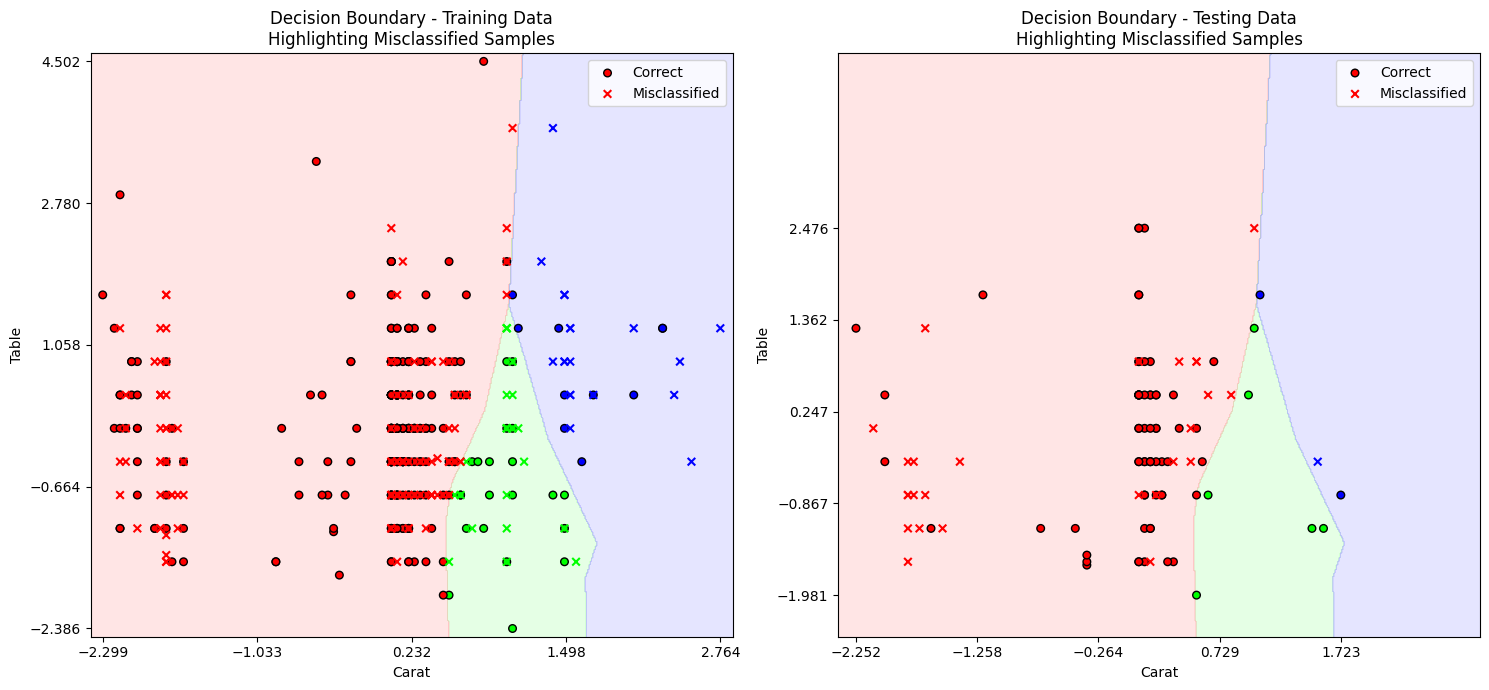

In [22]:

# Complete the code below

#Importing the necessary modules from files.
from layers import AffineLayer
from optimizers import RMSprop
from activations import ExponentialLinearUnit
from classifiers import Softmax
from losses import loss
from bases import Model
import numpy as np

model = bases.Model() # Create a model instance

#Mmodel layers
model_layers = [
    AffineLayer(input_size=2, output_size=8, seed=42),
    ExponentialLinearUnit(),
    AffineLayer(input_size=8, output_size=3, seed=42),
    Softmax()
]

model(model_layers) # Load layers to model object
predictions = np.ones(y.shape[0]) # Number of instances in the diamonds data
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Dataset Preperation
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index = int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    
def l1_regularization(model, strength):
    
    regularization_loss = 0
    
    for layer in model.layers:
        if isinstance(layer, layers.AffineLayer):
            regularization_loss += np.sum(np.abs(layer.W))
    
    return strength * regularization_loss  

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0.005  
n_epochs = 30
train_test_split_ratio = 0.2
print_every = 1
test_every = 1
test_points = []

if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

#Optimizer initialization
optimizer = RMSprop(model=model, lr=0.05)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    # Forward pass
    softmax_out = model.forward(X_train)
    
    # Get predictions and true labels as indices
    predictions = np.argmax(softmax_out, axis=1)
    y_train_indices = np.argmax(y_train, axis=1)  

    # Loss calculation
    loss_value = losses.loss(softmax_out, y_train_indices) + l1_regularization(model, regularization_strength)

    # accuracy calculation 
    train_acc = np.mean(predictions == y_train_indices)
    train_accs.append(train_acc)
    train_losses.append(loss_value)
    
    if epoch % print_every == 0:
        print(f"TRAIN:\tEpoch: {epoch:3d}, Loss: {loss_value:.5f}, Accuracy: {train_acc:.5f}")
    
    # Backward pass
    model.backward(y_train_indices)  
    optimizer.optimize()

    # Testing phase
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        
        softmax_out = model.forward(X_test)
        
        predictions = np.argmax(softmax_out, axis=1)
        y_test_indices = np.argmax(y_test, axis=1)  
        
        test_loss = losses.loss(softmax_out, y_test_indices) + l1_regularization(model, regularization_strength)
                
        test_acc = np.mean(predictions == y_test_indices)
        test_losses.append(test_loss)
        test_points.append(epoch)
        test_accs.extend([test_acc for i in range(test_every)])    
        print(f"TEST:\tEpoch: {epoch:3d}, Loss: {test_loss:.5f}, Accuracy: {test_acc:.5f}")
print(max(test_accs))

import matplotlib.pyplot as plt
# insert your code below

# Plot training and test losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Train Loss', color='blue')
plt.plot(test_points, test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()



plot_confusion_matrix(y, y_pred, class_names=['Ideal', 'Good', 'Very Good'])
decision_boundary(model, X_train, y_train, X_test, y_test)    

In [38]:
# insert your codes and write your comments here.

diamonds_filtered = (diamonds[diamonds['clarity'].isin(['SI1', 'VS2', 'SI2'])]).iloc[:500]
diamonds_filtered = diamonds_filtered[['carat','depth', 'table', 'clarity', 'price']]

print(diamonds_filtered.head())

diamonds_filtered['clarity'].value_counts()

   carat  depth  table clarity  price
0   0.23   61.5   55.0     SI2    326
1   0.21   59.8   61.0     SI1    326
3   0.29   62.4   58.0     VS2    334
4   0.31   63.3   58.0     SI2    335
7   0.26   61.9   55.0     SI1    337


clarity
SI1     219
VS2     173
SI2     108
IF        0
VVS1      0
VVS2      0
VS1       0
I1        0
Name: count, dtype: int64

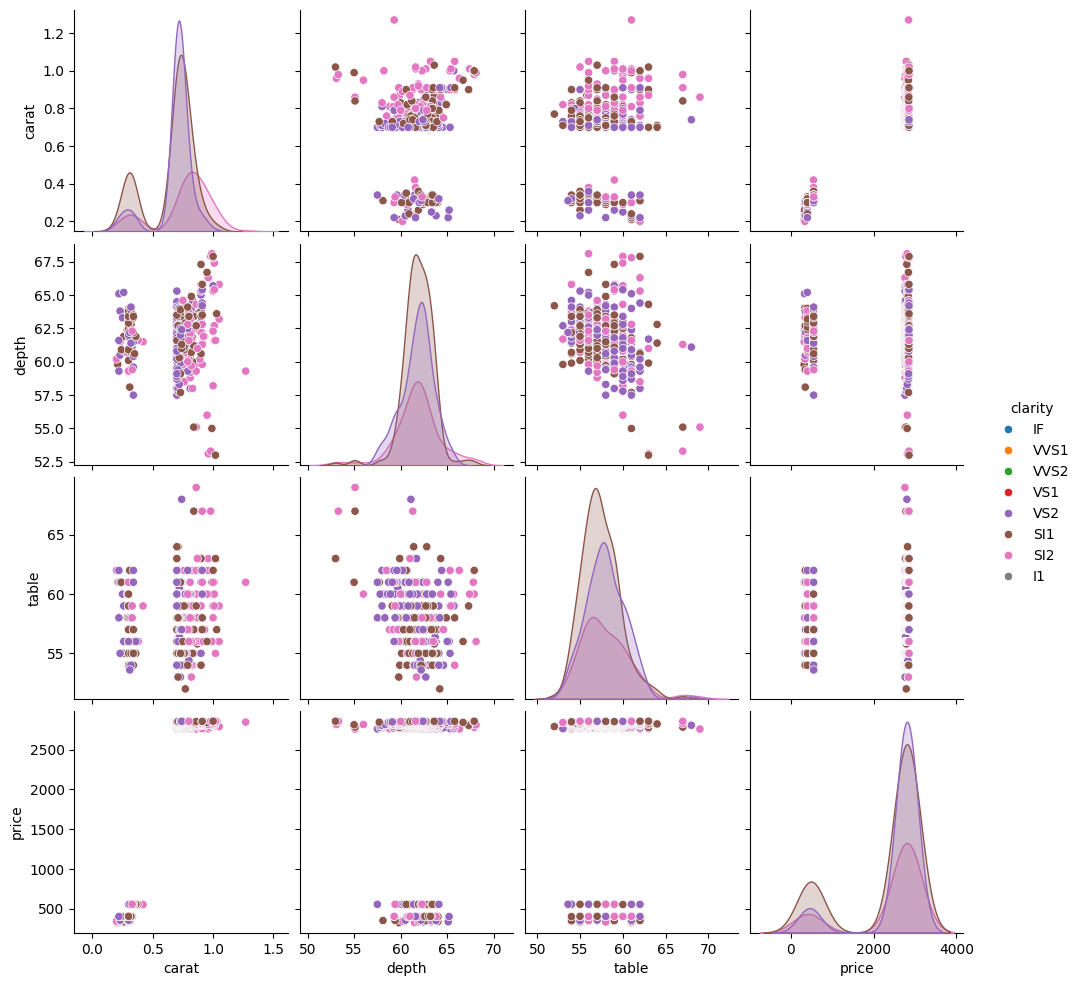

In [39]:
sns.pairplot(diamonds_filtered, hue='clarity')

In [40]:
from sklearn import preprocessing

# choose a pair of features to form data X. Convert the diamonds color label to index label y. 
# Drop NANs
data = diamonds_filtered[['depth', 'carat', 'clarity']].dropna() #TODO
# See how much data points you have 
# Prepare your data. Choose two feature columns. and get target labels as an integer or one-hot encoded value
X = data[['depth', 'carat']].values

y = preprocessing.OneHotEncoder(sparse_output=False).fit_transform(data[['clarity']])

# Shapes
print('clarity filtered dataset')
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

clarity filtered dataset
X shape: (500, 2)
y shape: (500, 3)


(400, 2) (400, 3)
TRAIN:	Epoch:   0, Loss: 1.24935, Accuracy: 0.40250
TEST:	Epoch:   0, Loss: 1.31634, Accuracy: 0.44000
TRAIN:	Epoch:   1, Loss: 1.24947, Accuracy: 0.43750
TEST:	Epoch:   1, Loss: 1.15632, Accuracy: 0.52000
TRAIN:	Epoch:   2, Loss: 1.18079, Accuracy: 0.46500
TEST:	Epoch:   2, Loss: 1.16387, Accuracy: 0.44000
TRAIN:	Epoch:   3, Loss: 1.13274, Accuracy: 0.45500
TEST:	Epoch:   3, Loss: 1.10878, Accuracy: 0.53000
TRAIN:	Epoch:   4, Loss: 1.10699, Accuracy: 0.51250
TEST:	Epoch:   4, Loss: 1.09810, Accuracy: 0.48000
TRAIN:	Epoch:   5, Loss: 1.09151, Accuracy: 0.48250
TEST:	Epoch:   5, Loss: 1.08640, Accuracy: 0.52000
TRAIN:	Epoch:   6, Loss: 1.08107, Accuracy: 0.51750
TEST:	Epoch:   6, Loss: 1.08231, Accuracy: 0.51000
TRAIN:	Epoch:   7, Loss: 1.07218, Accuracy: 0.51750
TEST:	Epoch:   7, Loss: 1.07466, Accuracy: 0.51000
TRAIN:	Epoch:   8, Loss: 1.06496, Accuracy: 0.52000
TEST:	Epoch:   8, Loss: 1.06812, Accuracy: 0.53000
TRAIN:	Epoch:   9, Loss: 1.05815, Accuracy: 0.52500
TES

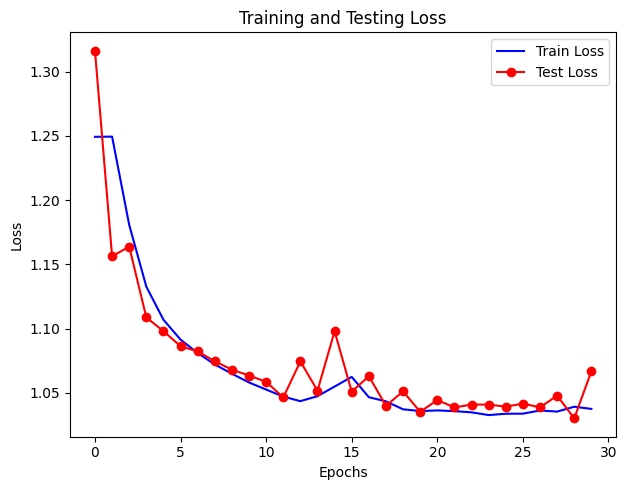

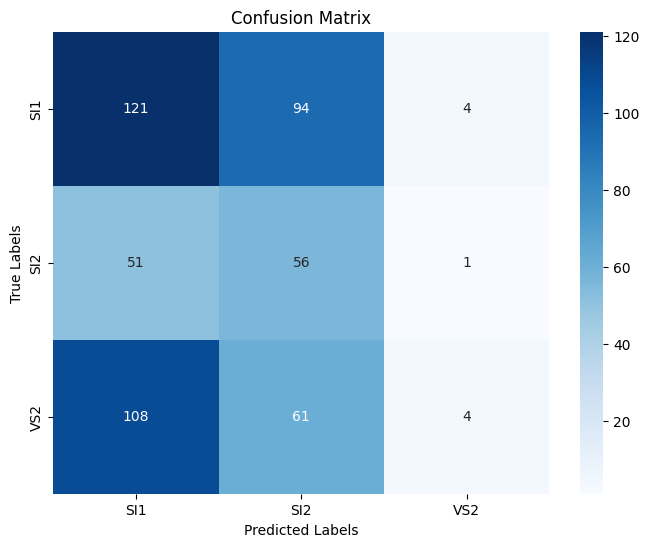

C:\Users\hfd\AppData\Local\Temp\ipykernel_21260\3108239276.py:42: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(X[misclassified][:, 0], X[misclassified][:, 1],


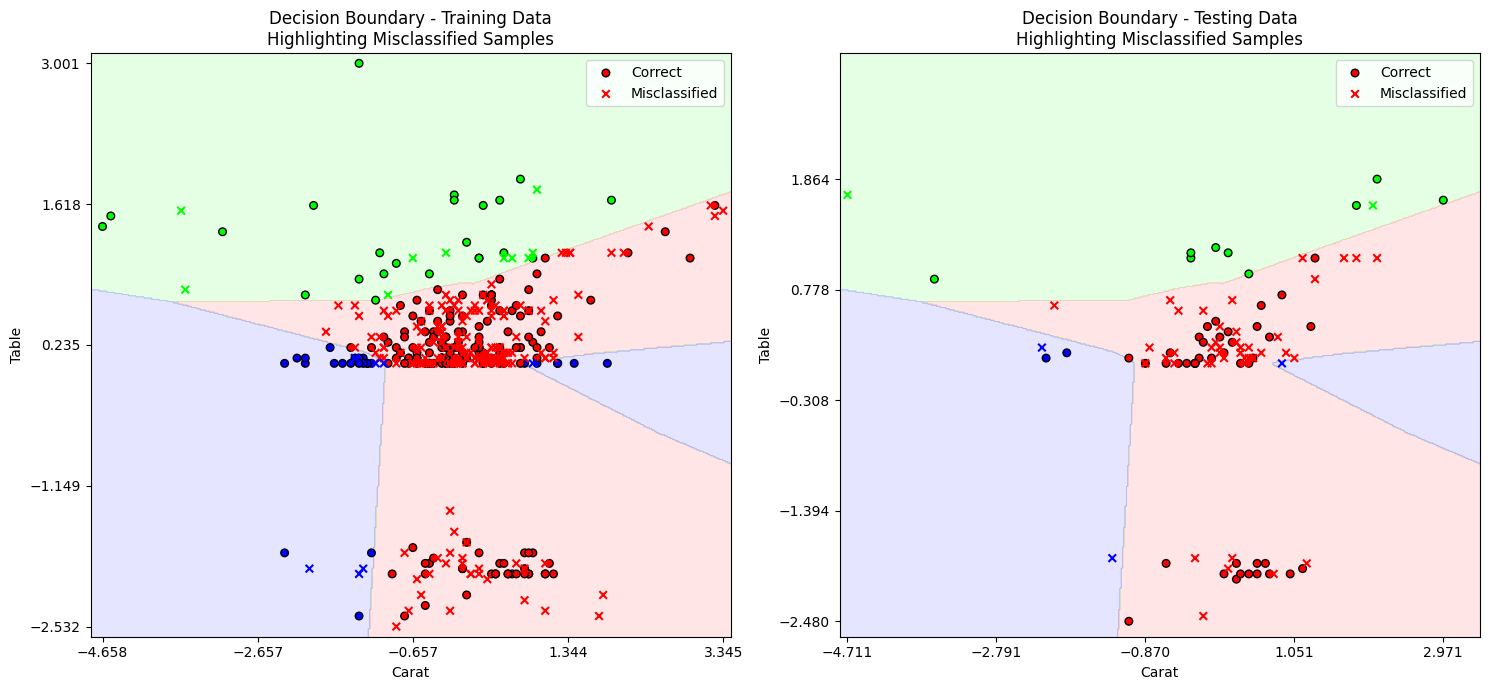

In [41]:

# Complete the code below

#Importing the necessary modules from files.
from layers import AffineLayer
from optimizers import RMSprop
from activations import ExponentialLinearUnit
from classifiers import Softmax
from losses import loss
from bases import Model
import numpy as np

model = bases.Model() # Create a model instance

#Mmodel layers
model_layers = [
    AffineLayer(input_size=2, output_size=8, seed=42),
    ExponentialLinearUnit(),
    AffineLayer(input_size=8, output_size=3, seed=42),
    Softmax()
]

model(model_layers) # Load layers to model object
predictions = np.ones(y.shape[0]) # Number of instances in the diamonds data
train_accs = []
test_accs = []
train_losses = []
test_losses = []

# Dataset Preperation
def create_permutation(x, y):
    perm = np.random.permutation(len(x))
    return x[perm], y[perm]

def train_test_split(X, y, ratio=.2):
    X, y = create_permutation(X, y)
    split_index = int(len(X) * (1-ratio))
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[split_index:], y[split_index:]
    return X_train, y_train, X_test, y_test
    
def l1_regularization(model, strength):
    
    regularization_loss = 0
    
    for layer in model.layers:
        if isinstance(layer, layers.AffineLayer):
            regularization_loss += np.sum(np.abs(layer.W))
    
    return strength * regularization_loss  

# Options
preprocessing_on = True
shuffle_on_each_epoch = True
regularization_strength = 0.005  
n_epochs = 30
train_test_split_ratio = 0.2
print_every = 1
test_every = 1
test_points = []

if preprocessing_on:
    X = preprocessing.scale(X)
X_train, y_train, X_test, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape)

#Optimizer initialization
optimizer = RMSprop(model=model, lr=0.05)

for epoch in range(n_epochs):
    if shuffle_on_each_epoch:
        X_train, y_train = create_permutation(X_train, y_train)

    # Forward pass
    softmax_out = model.forward(X_train)
    
    # Get predictions and true labels as indices
    predictions = np.argmax(softmax_out, axis=1)
    y_train_indices = np.argmax(y_train, axis=1)  

    # Loss calculation
    loss_value = losses.loss(softmax_out, y_train_indices) + l1_regularization(model, regularization_strength)

    # accuracy calculation 
    train_acc = np.mean(predictions == y_train_indices)
    train_accs.append(train_acc)
    train_losses.append(loss_value)
    
    if epoch % print_every == 0:
        print(f"TRAIN:\tEpoch: {epoch:3d}, Loss: {loss_value:.5f}, Accuracy: {train_acc:.5f}")
    
    # Backward pass
    model.backward(y_train_indices)  
    optimizer.optimize()

    # Testing phase
    if epoch % test_every == 0 or epoch == n_epochs - 1:
        
        softmax_out = model.forward(X_test)
        
        predictions = np.argmax(softmax_out, axis=1)
        y_test_indices = np.argmax(y_test, axis=1)  
        
        test_loss = losses.loss(softmax_out, y_test_indices) + l1_regularization(model, regularization_strength)
                
        test_acc = np.mean(predictions == y_test_indices)
        test_losses.append(test_loss)
        test_points.append(epoch)
        test_accs.extend([test_acc for i in range(test_every)])    
        print(f"TEST:\tEpoch: {epoch:3d}, Loss: {test_loss:.5f}, Accuracy: {test_acc:.5f}")
print(max(test_accs)) 


import matplotlib.pyplot as plt
# insert your code below

# Plot training and test losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), train_losses, label='Train Loss', color='blue')
plt.plot(test_points, test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()

plot_confusion_matrix(y, y_pred, class_names=['SI1', 'SI2', 'VS2'])
decision_boundary(model, X_train, y_train, X_test, y_test)    

Cut is a better option for my model because loss is lower when I use cut as the target variable and accuracy is better also the loss has asmoother and non-saturating plot. Also as can be seen from the confusion matrices and desicion boundaries cut is much better for my model.





## 3. Pytorch (15 pts)
#### Repeat the model construction and training/testing (.f) with Pytorch layers and activations and optimizers. 

     color
0        E
1        E
2        E
4        J
5        J
...    ...
1211     E
1216     E
1218     E
1220     E
1222     H

[500 rows x 1 columns]
Epoch 1/29
Train Loss: 31.6358, Train Accuracy: 33.75%
Test Loss: 6.1850, Test Accuracy: 22.00%

Epoch 2/29
Train Loss: 2.8043, Train Accuracy: 51.50%
Test Loss: 1.0298, Test Accuracy: 67.00%

Epoch 3/29
Train Loss: 0.6482, Train Accuracy: 56.25%
Test Loss: 0.4624, Test Accuracy: 67.00%

Epoch 4/29
Train Loss: 0.4249, Train Accuracy: 56.25%
Test Loss: 0.3990, Test Accuracy: 67.00%

Epoch 5/29
Train Loss: 0.4002, Train Accuracy: 57.00%
Test Loss: 0.3903, Test Accuracy: 67.00%

Epoch 6/29
Train Loss: 0.3944, Train Accuracy: 57.50%
Test Loss: 0.3822, Test Accuracy: 67.00%

Epoch 7/29
Train Loss: 0.3960, Train Accuracy: 57.25%
Test Loss: 0.3851, Test Accuracy: 67.00%

Epoch 8/29
Train Loss: 0.3926, Train Accuracy: 57.00%
Test Loss: 0.4020, Test Accuracy: 52.00%

Epoch 9/29
Train Loss: 0.3894, Train Accuracy: 54.75%
Test Loss: 0.3747, Te

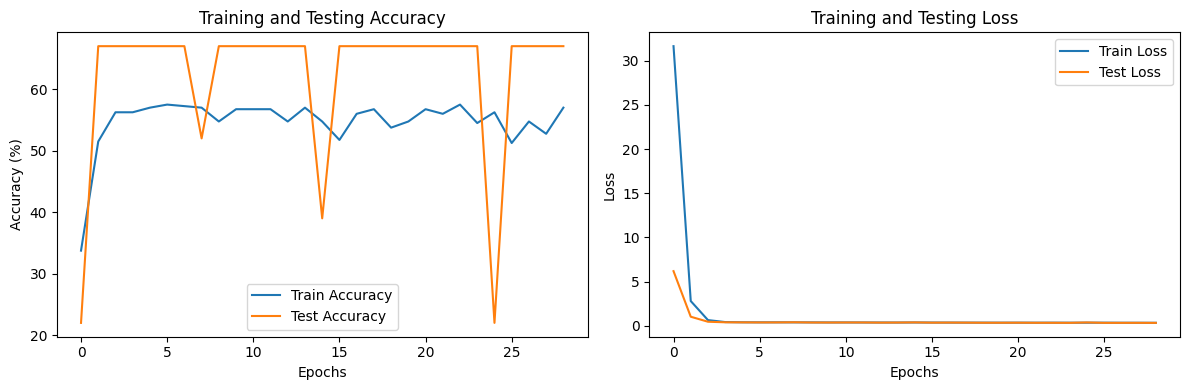

Best Test Accuracy: 67.00%


In [54]:
#Importing the necessary modules from files.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Seed setup
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)

#Diamond dataset preparation
def prepare_diamonds_data():
    
    diamonds = sns.load_dataset("diamonds")
    
    diamonds_filtered = (diamonds[diamonds['color'].isin(['E', 'J', 'H'])]).iloc[:500]
    diamonds_filtered = diamonds_filtered[['carat','depth', 'table', 'color', 'price']]
    
    data = diamonds_filtered[['carat', 'table', 'color']].dropna()
    
    # Features are sleected as carat and table
    X = data[['carat', 'table']].values
    
    # One-hot encoding color
    one_hot_encoder = preprocessing.OneHotEncoder()
    y = one_hot_encoder.fit_transform(data[['color']]).toarray()
    
    print(data[['color']])
    return X, y, one_hot_encoder

#Classifier model class
class DiamondClassifier(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, num_classes=3):
        super(DiamondClassifier, self).__init__()
        # Defining the layers
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ELU(),
            nn.Linear(hidden_size, num_classes)
        )
    # forward pass call
    def forward(self, x):
        return self.layers(x)

# Fucntion to train the model
def train_model(model, train_loader, test_loader, criterion, optimizer, n_epochs=29, l1_strength=0.01):
    
    # Accuracy and loss arays
    train_accs, test_accs = [], []
    train_losses, test_losses = [], []
    
    for epoch in range(n_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        correct_train = 0
        total_train = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X, batch_y
            
            optimizer.zero_grad()
            
            # Forward pass call
            outputs = model(batch_X)
            
            # L1 regularization for training loss
            l1_loss = sum(p.abs().sum() for p in model.parameters())
            
            # Computing loss
            loss = criterion(outputs, batch_y) + l1_strength * l1_loss
            
            # Backward pass and optimize calls
            loss.backward()
            optimizer.step()
            
            # Compute training accuracy
            _, predicted = torch.max(outputs.data, 1)
            _, true_labels = torch.max(batch_y, 1)
            total_train += true_labels.size(0)
            correct_train += (predicted == true_labels).sum().item()
            total_train_loss += loss.item()
        
        # Metrics of training
        train_acc = 100 * correct_train / total_train
        train_loss = total_train_loss / len(train_loader)
        train_accs.append(train_acc)
        train_losses.append(train_loss)
        
        # Validation phase
        model.eval()
        total_test_loss = 0
        correct_test = 0
        total_test = 0
        
        with torch.no_grad():
            for batch_X, batch_y in test_loader:
                batch_X, batch_y = batch_X, batch_y
                
                outputs = model(batch_X)
                
                # L1 regularization for test loss
                l1_loss = sum(p.abs().sum() for p in model.parameters())
                
                # Compute loss (test)
                loss = criterion(outputs, batch_y) + l1_strength * l1_loss
                
                # Compute test accuracy
                _, predicted = torch.max(outputs.data, 1)
                _, true_labels = torch.max(batch_y, 1)
                total_test += true_labels.size(0)
                correct_test += (predicted == true_labels).sum().item()
                total_test_loss += loss.item()
        
        # Test metrics
        test_acc = 100 * correct_test / total_test
        test_loss = total_test_loss / len(test_loader)
        test_accs.append(test_acc)
        test_losses.append(test_loss)
        
        # Print epoch results
        print(f"Epoch {epoch+1}/{n_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%\n")
    
    # Plotting the results
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.title('Training and Testing Accuracy')
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(test_accs, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.title('Training and Testing Loss')
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return train_accs, test_accs, train_losses, test_losses

def main():
    
    set_seed(42)
    
    # Preparing data
    X, y, encoder = prepare_diamonds_data()
    
    #Pytorch tensors
    X_tensor = torch.FloatTensor(X)
    y_tensor = torch.FloatTensor(y)
    
    #Data split for traişning and testing
    X_train, X_test, y_train, y_test = train_test_split(
        X_tensor, y_tensor, test_size=0.2, random_state=42
    )
    
    #Dataset and Dataloader creation
    train_dataset = TensorDataset(X_train, y_train)
    test_dataset = TensorDataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Initialize model, loss, and optimizer
    model = DiamondClassifier(input_size=X.shape[1], num_classes=y.shape[1])
    criterion = nn.MSELoss()  #MSE loss for regression
    optimizer = optim.RMSprop(model.parameters(), lr=0.001)
    
    # Training the model
    train_accs, test_accs, train_losses, test_losses = train_model(
        model, train_loader, test_loader, criterion, optimizer
    )
    
    print(f"Best Test Accuracy: {max(test_accs):.2f}%")


if __name__ == "__main__":
    main()